In [526]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Получение данных:

In [527]:
df = pd.read_csv('https://github.com/SergKostarev/ml_outliers/blob/main/glass.csv?raw=true')

In [528]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [529]:
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [530]:
df.isnull().sum()

,0
RI,0
Na,0
Mg,0
Al,0
Si,0
K,0
Ca,0
Ba,0
Fe,0
Type,0


Подсчет количества наблюдений по классам. Видно, что количество наблюдений распределено неравномерно (от 9 до 76):

In [531]:
df['Type'].value_counts()

,count
Type,
2,76
1,70
7,29
3,17
5,13
6,9


Классификация без удаления выбросов:

In [532]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [533]:
def classify(X, Y):
  X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=1)
  clf = RandomForestClassifier(random_state=1)
  clf.fit(X_train, y_train)
  print(clf.score(X_test, y_test))

In [534]:
X = df.iloc[:,:9]
Y = df.iloc[:,9]

In [535]:
classify(X, Y)

0.7674418604651163


Статистическое исследование выбросов. Видно, что Mg, Ba, K, Fe не обладают нормальным распределением:

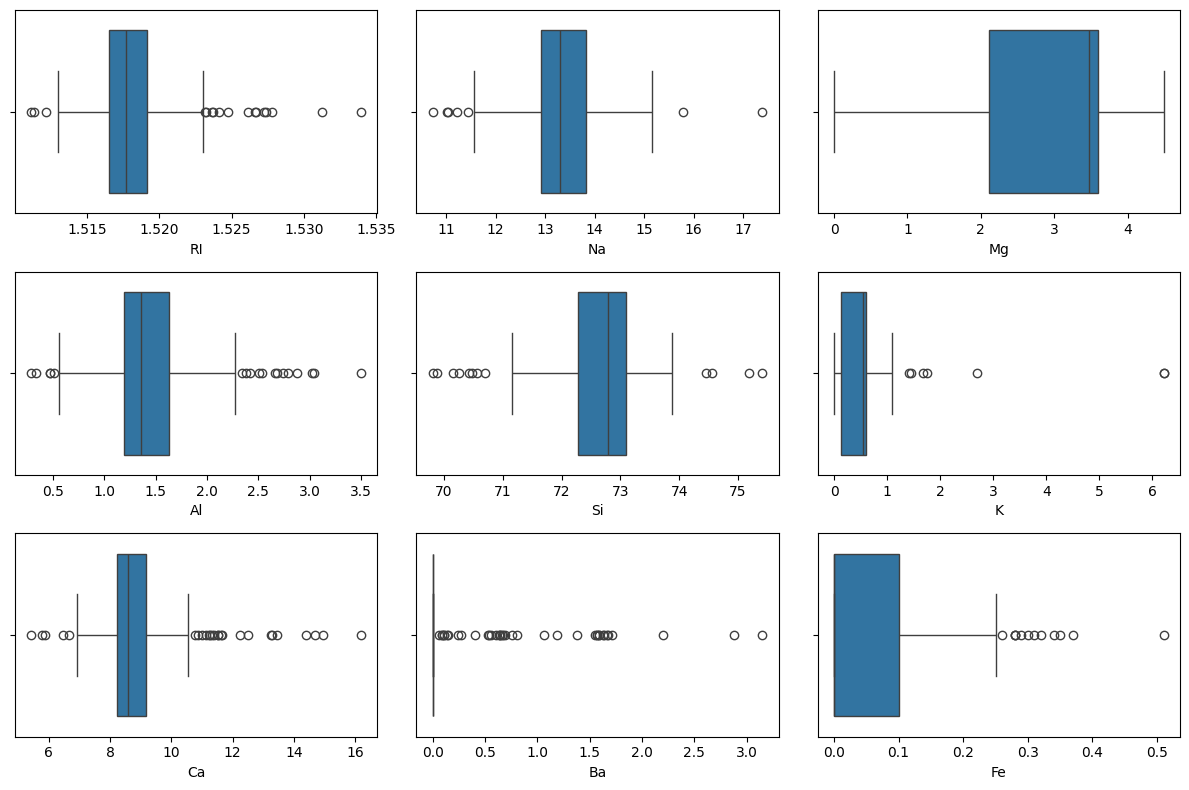

In [536]:
fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(12, 8))
for i in range(ax.shape[0]):
    for j in range(ax.shape[1]):
      column = X.iloc[:, 3*i + j];
      box_plot = sns.boxplot(x=column, ax=ax[i][j])
fig.tight_layout()
plt.show()

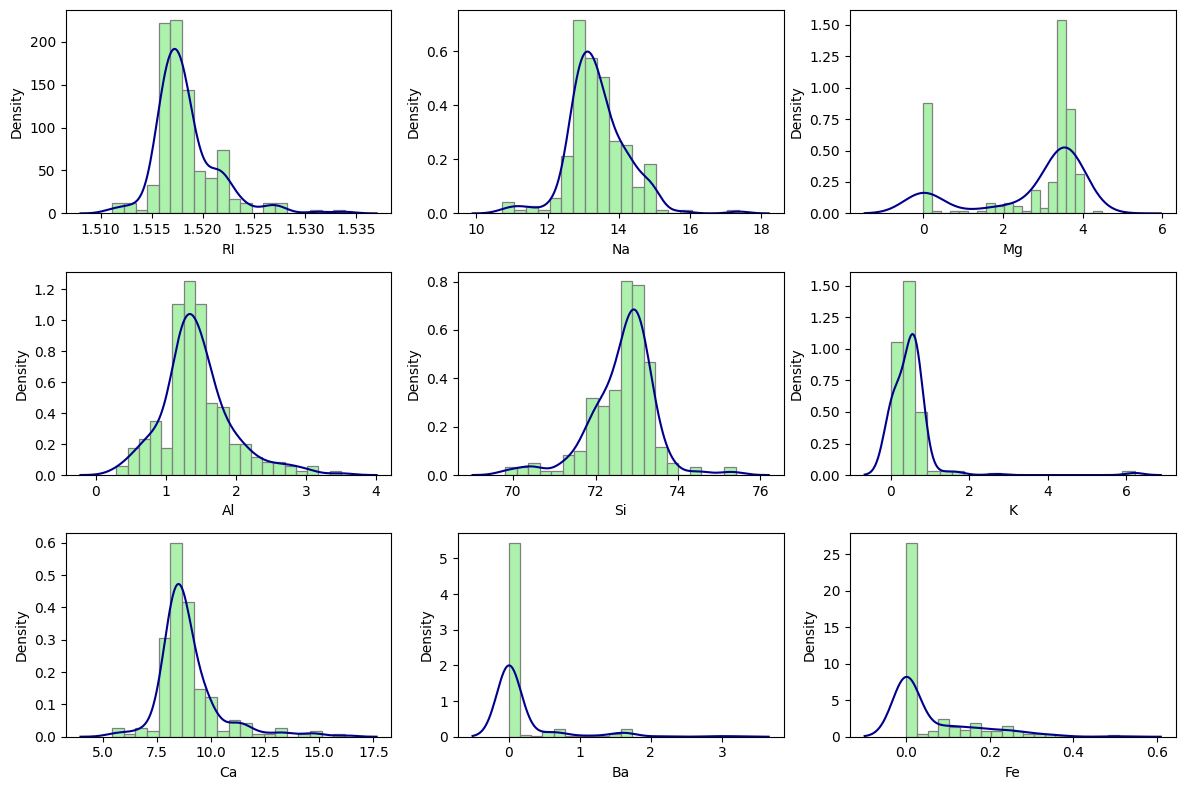

In [537]:
fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(12, 8))
for i in range(ax.shape[0]):
    for j in range(ax.shape[1]):
      column = X.iloc[:, 3*i + j];
      plot = sns.histplot(column, bins=20, kde=False, color='lightgreen', edgecolor='grey', stat='density', ax=ax[i][j])
      kde_plot = sns.kdeplot(column, color='darkblue', ax=ax[i][j])
fig.tight_layout()
plt.show()

Изолирующий лес:

In [538]:
from sklearn.ensemble import IsolationForest

In [539]:
X = df.iloc[:,:9]
Y = df.iloc[:,9]

In [540]:
isolation_forest = IsolationForest(random_state=1)
labels = isolation_forest.fit_predict(X)
labels

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1, -1,  1, -1, -1, -1,  1,  1, -1, -1, -1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1, -1, -1,  1,  1,  1,  1,  1,  1,
        1, -1, -1,  1, -1, -1,  1,  1,  1,  1, -1,  1,  1,  1, -1, -1, -1,
        1, -1, -1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,
        1,  1,  1, -1,  1,  1,  1,  1,  1,  1])

In [541]:
X = X[labels > -1]
Y = Y[labels > -1]
X.shape

(191, 9)

In [542]:
classify(X, Y)

0.6923076923076923


Метод опорных векторов для одного класса:

In [543]:
from sklearn.svm import OneClassSVM

In [544]:
X = df.iloc[:,:9]
Y = df.iloc[:,9]

In [545]:
model = OneClassSVM(kernel="rbf", nu=0.1, gamma=0.1)
labels = model.fit_predict(X)
labels

array([-1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1, -1,  1, -1, -1, -1,  1, -1, -1, -1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1, -1,  1,  1,  1,
        1, -1, -1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1, -1, -1, -1,
        1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1, -1,  1,
        1,  1,  1, -1,  1, -1,  1,  1,  1,  1])

In [546]:
X = X[labels > -1]
Y = Y[labels > -1]
X.shape

(192, 9)

In [547]:
classify(X, Y)

0.717948717948718


DBSCAN:

In [548]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

In [549]:
X = df.iloc[:,:9]
Y = df.iloc[:,9]

In [550]:
X = StandardScaler().fit_transform(X)
db = DBSCAN(eps=4, min_samples=10).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_
labels

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0, -1, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,
        0, -1, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0])

In [551]:
pd.DataFrame(X).head()

,0,1,2,3,4,5,6,7,8
0,0.872868,0.284953,1.254639,-0.692442,-1.127082,-0.671705,-0.145766,-0.352877,-0.586451
1,-0.249333,0.591817,0.636168,-0.170460,0.102319,-0.026213,-0.793734,-0.352877,-0.586451
2,-0.721318,0.149933,0.601422,0.190912,0.438787,-0.164533,-0.828949,-0.352877,-0.586451
3,-0.232831,-0.242853,0.698710,-0.310994,-0.052974,0.112107,-0.519052,-0.352877,-0.586451
4,-0.312045,-0.169205,0.650066,-0.411375,0.555256,0.081369,-0.624699,-0.352877,-0.586451


In [552]:
X = X[core_samples_mask]
Y = Y[core_samples_mask]
X.shape

(200, 9)

In [553]:
classify(X, Y)

0.825


In [554]:
from collections import Counter
counter_df = Counter(df['Type'])
counter_cleaned = Counter(Y)
for element, count in counter_df.items():
  removed_rows_percent = round(100 * (1 - counter_cleaned[element] / count), 1)
  print("type: " + str(element) + ", removed rows percent: " + str(removed_rows_percent))

type: 1, removed rows percent: 0.0
type: 2, removed rows percent: 7.9
type: 3, removed rows percent: 0.0
type: 5, removed rows percent: 23.1
type: 6, removed rows percent: 11.1
type: 7, removed rows percent: 13.8


Выводы:
В работе рассмотрены методы автоматизированного удаления выбросов - IsolationForest, OneClassSVM и DBSCAN. Доля правильных ответов при моделировании без удаления выбросов составила 0,77. После удаления выбросов с помощью DBSCAN доля правильных ответов увеличилась до 0,83. Послу использования DBSCAN количество наблюдений в зависимости от класса сократилось на величину от 0 до 23%, что существенно для небольших по размеру классов.
Следует отметить, что все методы чувствительны к подбору гиперпараметров. IsolationForest и OneClassSVM удаляли примерно в два раза больше наблюдений, чем DBSCAN, из-за чего качество модели только ухудшалось. Таким образом, методы автоматизированного обнаружения выбросов могут применяться для работы с данными, но требуется дальнейшая проверка их результатов.